In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, LeakyReLU
from keras import backend
from keras.callbacks import TensorBoard
from keras.optimizers import Adam
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#WITH SVOL
call_df=pd.read_csv('/content/drive/MyDrive/black_scholes_option_pricing/splitted_put_with_svol')
# put_df=pd.read_csv('/content/drive/MyDrive/black_scholes_option_pricing/Put_with_svol.csv')

In [ ]:
for i in range(len(call_df)):
  if (call_df["Expiration"][i]==0):
    call_df["Expiration"][i]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
call_df.head(1)

,Unnamed: 0,Unnamed: 0.1,Date,Strike Price,Close,Expiration,Adj Close,return,volatility,Price,bs_call,svol,Moneyness_put
0,0,0,2013-12-31,5800,6.3,30,6304.0,0.002051,0.135503,8.82,0.780877,0.006838,OTM


In [ ]:
call_df_OTM = call_df[call_df["Moneyness_put"]=="OTM"]
call_df_OTM.drop(["Moneyness_put"], axis=1, inplace=True)
call_df = call_df_OTM

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
call_df.head(1)

,Unnamed: 0,Unnamed: 0.1,Date,Strike Price,Close,Expiration,Adj Close,return,volatility,Price,bs_call,svol
0,0,0,2013-12-31,5800,6.3,30,6304.0,0.002051,0.135503,8.82,0.780877,0.006838


In [ ]:
call_df[call_df["Expiration"]==0]

,Unnamed: 0,Unnamed: 0.1,Date,Strike Price,Close,Expiration,Adj Close,return,volatility,Price,bs_call,svol


In [ ]:
call_df=call_df.set_index(['Date'])
# put_df=put_df.set_index(['Date'])

In [ ]:
call_df=call_df.iloc[:,1:]
# put_df=put_df.iloc[:,1:]

In [ ]:
call_df

,Unnamed: 0.1,Strike Price,Close,Expiration,Adj Close,return,volatility,Price,bs_call,svol
Date,,,,,,,,,,
2013-12-31,0,5800,6.30,30,6304.000000,0.002051,0.135503,8.820,0.780877,0.006838
2013-12-31,1,5900,10.30,30,6304.000000,0.002051,0.135503,8.820,2.667110,0.006838
2013-12-31,2,6000,17.15,30,6304.000000,0.002051,0.135503,8.820,7.656025,0.006838
2013-12-31,3,6100,28.80,30,6304.000000,0.002051,0.135503,8.820,18.756159,0.006838
2013-12-31,4,6200,49.10,30,6304.000000,0.002051,0.135503,8.820,39.837882,0.006838
...,...,...,...,...,...,...,...,...,...,...
2020-12-30,56786,13650,4.55,1,13981.950195,0.003542,0.145312,5.899,0.020935,0.009145
2020-12-30,56787,13700,5.50,1,13981.950195,0.003542,0.145312,5.899,0.111738,0.009145
2020-12-30,56788,13750,7.35,1,13981.950195,0.003542,0.145312,5.899,0.485892,0.009145


In [ ]:
call_df=call_df[call_df['Close']>1]

In [ ]:
# Deep_itm=call_df[call_df['Adj Close']-call_df['Strike Price']>3000]
# itm=call_df[(call_df['Adj Close']-call_df['Strike Price']>0) & (call_df['Adj Close']-call_df['Strike Price']<3000)]
# otm=call_df[call_df['Adj Close']<call_df['Strike Price']]

In [ ]:
def linear_regression(df):
  x=np.array(df['Close']).reshape(-1,1)
  y=np.array(df['bs_call']).reshape(-1,1)
  reg=LinearRegression().fit(x,y)
  mse= mean_absolute_error(x,y)
  return reg.score(x,y),ms

In [ ]:
def regression(df):
  sns.scatterplot(x=df['Close'],y=df['bs_call'],hue=df['Expiration'])

In [ ]:
call_df.head()

,Unnamed: 0.1,Strike Price,Close,Expiration,Adj Close,return,volatility,Price,bs_call,svol
Date,,,,,,,,,,
2013-12-31,0,5800,6.30,30,6304.0,0.002051,0.135503,8.82,0.780877,0.006838
2013-12-31,1,5900,10.30,30,6304.0,0.002051,0.135503,8.82,2.667110,0.006838
2013-12-31,2,6000,17.15,30,6304.0,0.002051,0.135503,8.82,7.656025,0.006838
2013-12-31,3,6100,28.80,30,6304.0,0.002051,0.135503,8.82,18.756159,0.006838
2013-12-31,4,6200,49.10,30,6304.0,0.002051,0.135503,8.82,39.837882,0.006838


In [ ]:
def split_data(df):
  call_X_train, call_X_test, call_y_train, call_y_test = train_test_split(df[['Strike Price','Expiration','Adj Close','Price','svol']],df['Close'],test_size=0.2,random_state=42)
  return call_X_train, call_X_test, call_y_train, call_y_test

In [ ]:
call_X_train, call_X_test, call_y_train, call_y_test=split_data(call_df)

In [ ]:
n_units = 400
layers = 5
n_batch = 100
n_epochs = 20

In [ ]:
model = Sequential()
model.add(Dense(n_units, input_dim=call_X_train.shape[1]))
model.add(LeakyReLU())

for _ in range(layers - 1):
    model.add(Dense(n_units))
    model.add(LeakyReLU())

model.add(Dense(1, activation='relu'))
opt = keras.optimizers.Adam(learning_rate=1e-6)
model.compile(loss='mse', optimizer=opt)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               2400      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 400)               160400    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 400)               1

In [ ]:
history = model.fit(call_X_train, call_y_train, 
                    batch_size=n_batch, epochs=n_epochs, 
                    validation_split = 0.2,
                    callbacks=[TensorBoard()],
                    verbose=1)

Epoch 1/20
167/167 [==============================] - 15s 9ms/step - loss: 33804.1370 - val_loss: 5593.4609
Epoch 2/20
167/167 [==============================] - 1s 4ms/step - loss: 6252.7713 - val_loss: 5539.2192
Epoch 3/20
167/167 [==============================] - 1s 4ms/step - loss: 6118.7642 - val_loss: 5498.7607
Epoch 4/20
167/167 [==============================] - 1s 4ms/step - loss: 6106.3496 - val_loss: 5490.8535
Epoch 5/20
167/167 [==============================] - 1s 3ms/step - loss: 6137.3935 - val_loss: 5474.0708
Epoch 6/20
167/167 [==============================] - 1s 4ms/step - loss: 5796.5938 - val_loss: 5458.2939
Epoch 7/20
167/167 [==============================] - 1s 3ms/step - loss: 6301.2246 - val_loss: 5447.7217
Epoch 8/20
167/167 [==============================] - 1s 4ms/step - loss: 6300.6176 - val_loss: 5424.7114
Epoch 9/20
167/167 [==============================] - 1s 3ms/step - loss: 5668.7539 - val_loss: 5416.7793
Epoch 10/20
167/167 [=======================

In [ ]:
call_y_pred = model.predict(call_X_test)

In [ ]:
call_y_pred

array([[62.74343 ],
       [70.43356 ],
       [ 8.373332],
       ...,
       [22.298168],
       [57.273586],
       [30.886612]], dtype=float32)

In [ ]:
x=np.array(call_y_test).reshape(-1,1)
y=np.array(call_y_pred).reshape(-1,1)
reg=LinearRegression().fit(x,y)
mae= mean_absolute_error(x,y)
mse=mean_squared_error(x,y)

In [ ]:
print(reg.score(x,y),mae,mse)

0.075750787033665 44.686611456871724 5421.2784905634335


In [ ]:
Explained_VAR=1-(np.std(x)/np.std(y))
Explained_VAR

-2.994386429676783

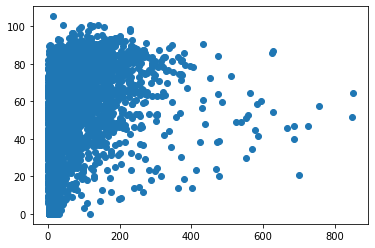

In [ ]:
plt.scatter(x,y)

In [ ]:
def split_data_bs(df):
  call_X_train, call_X_test, call_y_train, call_y_test = train_test_split(df[['Strike Price','Expiration','Adj Close','Price']],df['bs_call'],test_size=0.2,random_state=42)
  return call_X_train, call_X_test, call_y_train, call_y_test

In [ ]:
call_X_train_bs, call_X_test_bs, call_y_train_bs, call_y_test_bs=split_data_bs(call_df)


In [ ]:
x_bs=np.array(call_y_test).reshape(-1,1)
y_bs=np.array(call_y_test_bs).reshape(-1,1)
reg_bs=LinearRegression().fit(x_bs,y_bs)
mae_bs= mean_absolute_error(x_bs,y_bs)
mse_bs=mean_squared_error(x_bs,y_bs)

In [ ]:
print(reg_bs.score(x_bs,y_bs),mae_bs,mse_bs)


0.5229941766671953 34.551873898900105 3637.9449043329814


In [ ]:
Explained_VAR_bs=1-(np.std(x_bs)/np.std(y_bs))
Explained_VAR_bs

-0.06399410667686523